Department of Physics, University of Pisa (AA 2022-2023)

### Multimessenger Physics Laboratory tutorial series




## Tutorial 01 - Basic Fitting methods with Python
#### (M. Razzano, Mar 4, 2023)

In this tutorial we will review some basic methods to fit a curve using Python.
Commands inspired by https://astrofrog.github.io/

### Basic import

In [1]:
#First, import basic modules
import os

import numpy as np
#import Numpy
import os
import numpy as np

#this is the Scipy package to perform the fitting
from scipy import optimize

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
#Setup the main directories using the environ dir
#Define the various directories
tutorials_dir = os.getcwd()

#using dirname you can go up of one directory
main_dir = os.path.dirname(tutorials_dir)

#then use join to define variables pointing to subdirectories
data_dir = os.path.join(main_dir,"data")

print("Project main dir is %s" % main_dir)
print("Data dir is %s" %data_dir)
print("Tutorials dir is %s" %tutorials_dir)

Project main dir is /home/jovyan/astrophysics_2023/homework/homework-03---basic-fitting-with-python-hussainkitagawa
Data dir is /home/jovyan/astrophysics_2023/homework/homework-03---basic-fitting-with-python-hussainkitagawa/data
Tutorials dir is /home/jovyan/astrophysics_2023/homework/homework-03---basic-fitting-with-python-hussainkitagawa/tutorials


<h2>Simulate a simple dataset</h2>
We will fit a simple curve, a line, bu before we need to start with a simple dataset

Text(0, 0.5, 'Y')

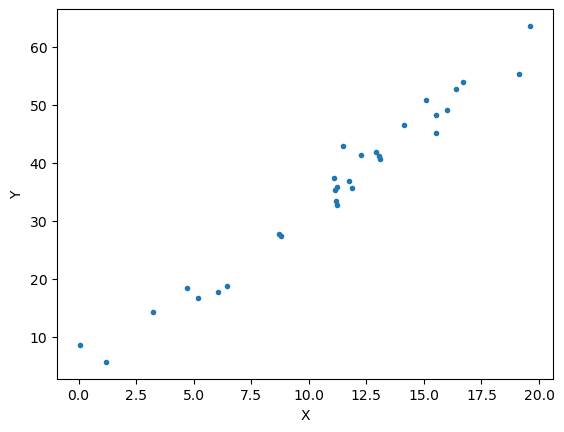

In [5]:
#first of all, let's generate some random data..


#define a set of random points in the X axis...
x = np.random.uniform(0., 20., 30)

#assign values on the y-axis with a random fluctuation
y = 3. * x + 2. + np.random.normal(0., 2., 30)

#plot them
plt.plot(x, y, '.')
plt.xlabel("X")
plt.ylabel("Y")


<h2>Simple fitting without error</h2>
We will fit a simple curve with a line

In [6]:
#now, define a model function for the fit
def straight_line(x, a, b):
    return a * x + b

In [7]:
#now, use curve fit 
popt, pcov = optimize.curve_fit(straight_line, x, y)

The *curve_fit* function returns two objects, here called popt and pcov. Popt contains are the best-fit paramters for a and b. The pcov contains the covariance matrix. 
**One important note**

* When printing the results pay attention to the significant digits!

In [8]:
print("a =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)

a = 2.9162018022321465 +/- 0.09710209602188674
b = 3.3190588252891806 +/- 1.1827782983127713


Now, you can now superimpose the line to the data

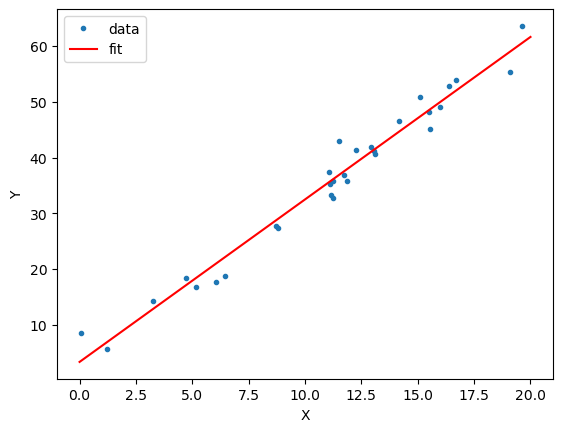

In [9]:
x_points = np.linspace(0., 20., 50)  # define values to plot the function for

#plot the data
#Notice! We add labels to data
plt.plot(x, y, '.',label="data")

#..and the fitted line
plt.plot(x_points, straight_line(x_points, popt[0], popt[1]), 'r-',label="fit")
plt.xlabel("X")
plt.ylabel("Y")

#we can also plot the legend box
plt.legend(loc="upper left")



Now you can repeat this example using for instance a Gauss function etc...
**One final remark** 
* usually, initial values for the parameters needs to be introduced, in particular for more complex functions, otherwise the fit is not converging easily. 
You can do it using the p0 keyword in curve_fit, e.g. p0=np.asarray([2,3])

In [11]:
#For instance, here...
popt, pcov = optimize.curve_fit(straight_line, x, y,p0=np.asarray([2,3]))

In [12]:
#the results are as before
print("a =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)

a = 2.9162017966295046 +/- 0.09710209614490133
b = 3.3190588493862028 +/- 1.182778313466069


<h2>Simple fitting with uncertainties</h2>
We will fit a simple curve with a line using errors

In [13]:
#First, let us add some simulated uncertainties drawing it from 
# a Gaussian with mu=0 and sigma=1
y_err = np.abs(np.random.normal(0., 0.3, 30))

<ErrorbarContainer object of 3 artists>

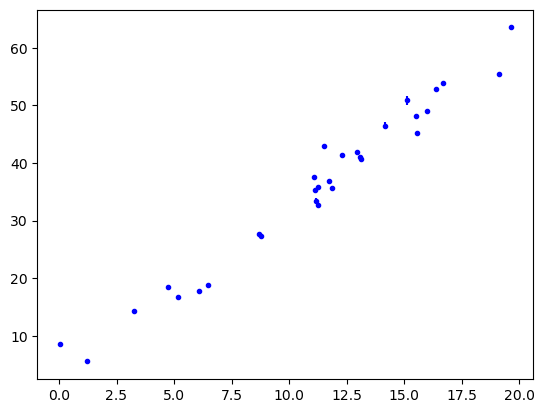

In [14]:
# Plot data
plt.errorbar(x,y,yerr=y_err,fmt='b.',label='data')

In [15]:
#now, use curve fit 
popt, pcov = optimize.curve_fit(straight_line, x, y,sigma=y_err,absolute_sigma=True)
print("a =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)

a = 3.2427079740103992 +/- 0.0017145550628775178
b = 1.3733966639274613 +/- 0.019773457610029445


<ErrorbarContainer object of 3 artists>

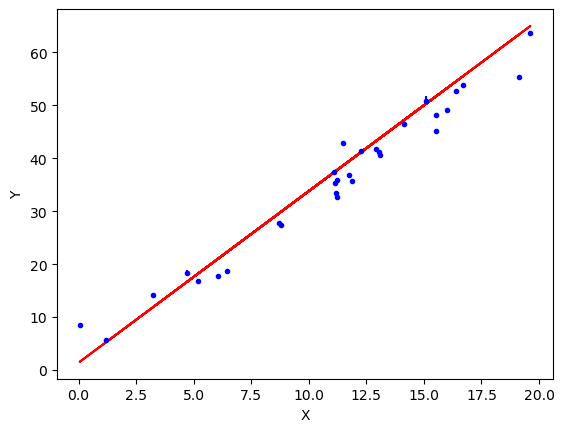

In [16]:
#now plot
#..and the fitted line
plt.plot(x, straight_line(x, popt[0], popt[1]), 'r-')
plt.xlabel("X")
plt.ylabel("Y")
# Plot data
plt.errorbar(x,y,yerr=y_err,fmt='b.',label='data')

<h2>Residuals and Chi Square</h2>
We can now plot the residuals

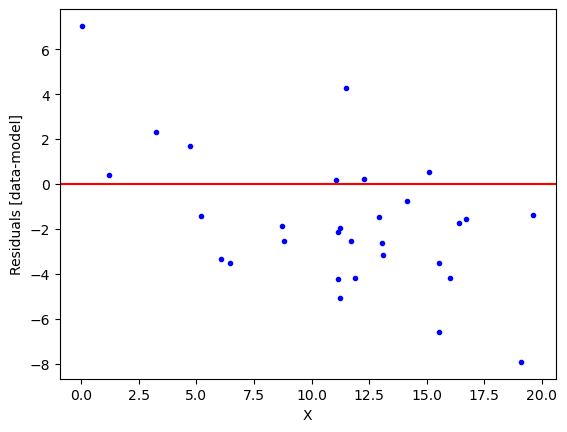

In [17]:
#compute residuals
residuals = y - straight_line(x, popt[0], popt[1])

#plot
plt.plot(x, residuals,'b.')
plt.xlabel("X")
plt.ylabel("Residuals [data-model]")

#draw line around zero
plt.axhline(0,color="r")

In [18]:
chisqr = sum((y-straight_line(x, popt[0], popt[1]))**2/y_err**2)
dof = len(y) - 2
chisqr_red = chisqr/dof
print(f'Reduced chi^2 = {chisqr_red}')

Reduced chi^2 = 19559.323530465506
